In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering

In [167]:
df = pd.read_csv('titanic_data.csv')

## Assessing

In [168]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

- <i> Issue No 1: Need to address missing values for columns Age, Cabin, and Embarked. <i/>

In [170]:
df.duplicated().sum() #Zero duplicates 

0

In [171]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Cleaning

- <b><i> Issue No 1: Need to address missing values for columns Age, Cabin, and Embarked. <i/><b/>

<b> Solving Issue No 1: Need to address missing values for columns Age, Cabin, and Embarked. <b/>

In [173]:
df_clean = df.copy() #making copy so that orignal data set remains intact.

Column Cabin contains alot of missing values, so I think it will be a good idea to drop this column.

In [174]:
df_clean.drop(['Cabin'],1,inplace=True)

In [175]:
df_clean.isna().sum()[df_clean.isna().sum() > 0]

Age         177
Embarked      2
dtype: int64

Now we are left with only two columns. Let's fill missing value for Age column first.

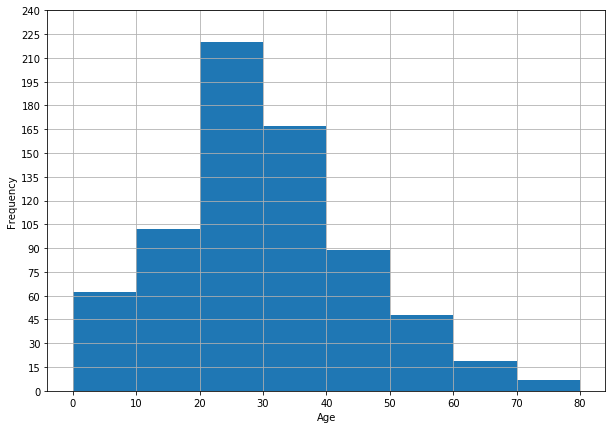

In [176]:
#Let's visualize distribution of Age.
df_clean.Age.plot(kind='hist',bins=np.arange(0,85,10),grid=True,figsize=(10,7));
plt.yticks(np.arange(0,250,15));
plt.xlabel('Age');

In [177]:
df_clean.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

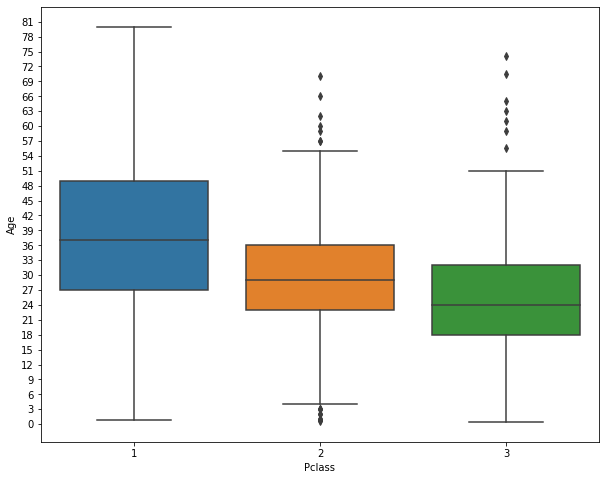

In [178]:
plt.subplots(figsize = (10,8))
sns.boxplot(x='Pclass',y='Age',data=df_clean);
plt.yticks(np.arange(0,82,3));

In [179]:
#print (df_clean.groupby('Pclass')['Age'].mean().loc[:])
def fill_age(row):
    #print(str(row['Age'] )== 'nan')
    if str(row['Age'] )== 'nan' : 
        if row['Pclass'] == 1:
            return df_clean.groupby('Pclass')['Age'].mean().loc[1]
        if row['Pclass'] == 2:
            return df_clean.groupby('Pclass')['Age'].mean().loc[2]
        else:
            return df_clean.groupby('Pclass')['Age'].mean().loc[3]
    else:
        return row['Age']



In [180]:
df_clean.Age = df_clean[['Age','Pclass']].apply(fill_age,1)

In [181]:
df_clean.drop (df_clean[df_clean.Embarked.isnull()].index,inplace=True) #Dropping rows where Embarked is Null.

In [182]:
df_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we don't have any missing values.

# Exploratory Data Analysis

In [183]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Lets drop columns that are irrelevant for analysis.

In [184]:
columns_to_drop = ['PassengerId','Name','Parch','Ticket','Embarked']
df_clean.drop(columns_to_drop,1,inplace=True)

In [185]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250
3,1,1,female,35.0,1,53.1000
4,0,3,male,35.0,0,8.0500


Now we will continue to explore data with intentions to find relationship among Survived and other columns.

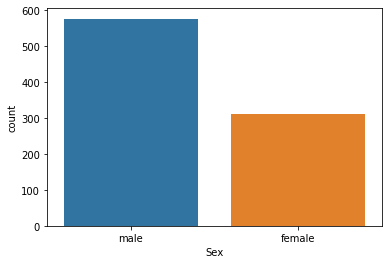

In [186]:
sns.countplot(x='Sex',data=df_clean);

- More Males than females.

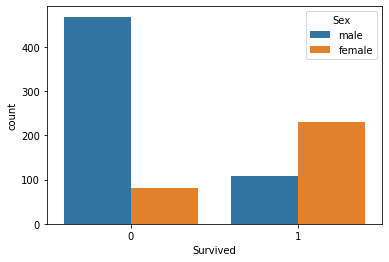

In [187]:
sns.countplot(hue='Sex',x='Survived',data=df_clean);

- Most of the survivors are females.

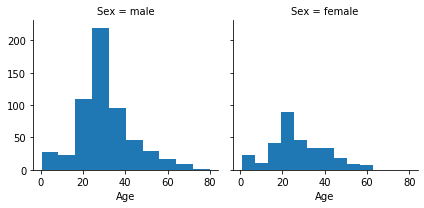

In [188]:
grid = sns.FacetGrid(col='Sex', data=df_clean)
grid.map(plt.hist,'Age');

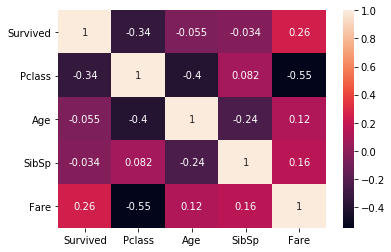

In [189]:
sns.heatmap (df_clean.corr(),annot=True);

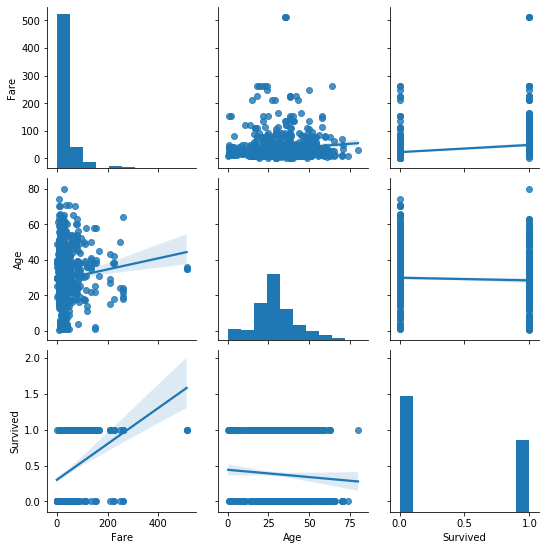

In [190]:
grid = sns.PairGrid(data=df_clean, vars=['Fare','Age','Survived'])
grid.map_diag(plt.hist)
grid.map_offdiag(sns.regplot);

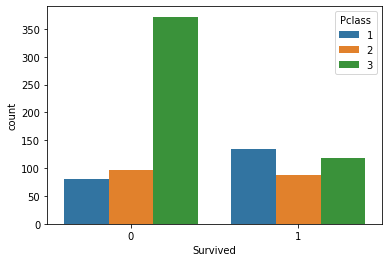

In [191]:
sns.countplot(hue='Pclass',x='Survived',data=df_clean);

- There are almost same number of survivors from passenger class 1 and 3. Most of the passengers of class 3 did not survive.

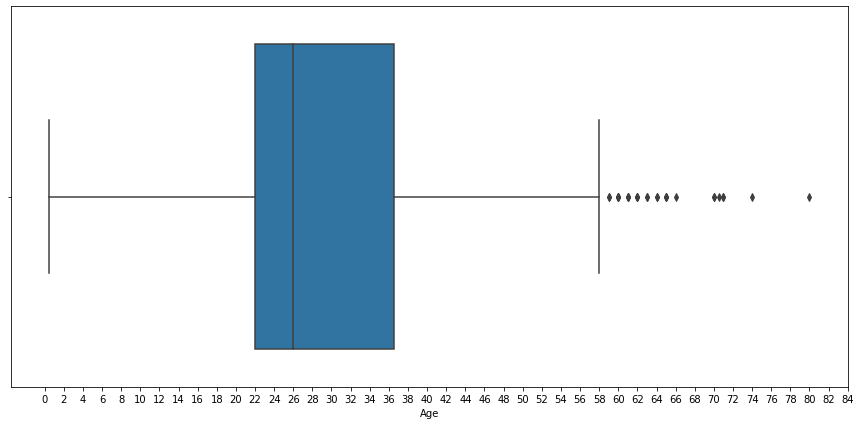

In [192]:
plt.subplots(figsize=(15,7))
sns.boxplot(x=df_clean.Age);
plt.xticks(np.arange(0,85,2));

# Predicting Survival

In [193]:
target = df_clean.Survived
inputs = df_clean.iloc[: , 1:]

In [194]:
print (target)
inputs

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


,Pclass,Sex,Age,SibSp,Fare
0,3,male,22.00000,1,7.2500
1,1,female,38.00000,1,71.2833
2,3,female,26.00000,0,7.9250
3,1,female,35.00000,1,53.1000
4,3,male,35.00000,0,8.0500
...,...,...,...,...,...
886,2,male,27.00000,0,13.0000
887,1,female,19.00000,0,30.0000
888,3,female,25.14062,1,23.4500
889,1,male,26.00000,0,30.0000


In [195]:
dummies = pd.get_dummies(df_clean.Sex) #creating dummy variables for Sex column.
inputs = pd.concat([inputs,dummies],axis=1)

In [197]:
inputs.drop(['Sex','female'],1,inplace=True)

In [200]:
print(target)
inputs

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


,Pclass,Age,SibSp,Fare,male
0,3,22.00000,1,7.2500,1
1,1,38.00000,1,71.2833,0
2,3,26.00000,0,7.9250,0
3,1,35.00000,1,53.1000,0
4,3,35.00000,0,8.0500,1
...,...,...,...,...,...
886,2,27.00000,0,13.0000,1
887,1,19.00000,0,30.0000,0
888,3,25.14062,1,23.4500,0
889,1,26.00000,0,30.0000,1


In [268]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(inputs,target,test_size=0.2)

In [269]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [270]:
model.score(X_test,Y_test)

0.8146067415730337

In [271]:
from sklearn.model_selection import cross_val_score
cross_val_score(model,inputs,target,cv=10,scoring='accuracy').mean()

0.7862870275791624

In [267]:
from sklearn.svm import SVC

model_SVC = SVC()
model_SVC.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [216]:
model_SVC.score(X_test,Y_test)

0.6853932584269663

In [241]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_SVC,inputs,target,cv=10,scoring='accuracy').mean()

0.6760342185903984

In [272]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [273]:
model_dtc.score(X_test,Y_test)

0.8146067415730337

In [274]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_dtc,inputs,target,cv=10,scoring='accuracy').mean()

0.7885725229826355

In [275]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_test,Y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [276]:
model_knn.score(X_test,Y_test)

0.8426966292134831

In [277]:
from sklearn.model_selection import cross_val_score
cross_val_score(model_knn,inputs,target,cv=10,scoring='accuracy').mean()

0.7064862104187946